<a href="https://colab.research.google.com/github/yejin2020/r_statistics/blob/master/%EC%8B%9C%ED%97%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
seoul <- read.csv('https://raw.githubusercontent.com/yejin2020/r_statistics/master/datasets/seoul_car_2015.txt', header=T,sep=' ')

summary(seoul)


      연도            월          자치구명            발생건수    
 Min.   :2015   Min.   : 1.00   Length:300         Min.   : 48.0  
 1st Qu.:2015   1st Qu.: 3.75   Class :character   1st Qu.:104.0  
 Median :2015   Median : 6.50   Mode  :character   Median :125.5  
 Mean   :2015   Mean   : 6.50                      Mean   :138.9  
 3rd Qu.:2015   3rd Qu.: 9.25                      3rd Qu.:157.8  
 Max.   :2015   Max.   :12.00                      Max.   :377.0  
    사망자수        부상자수    
 Min.   :0.000   Min.   : 68.0  
 1st Qu.:0.000   1st Qu.:144.0  
 Median :1.000   Median :175.0  
 Mean   :1.253   Mean   :195.5  
 3rd Qu.:2.000   3rd Qu.:219.2  
 Max.   :5.000   Max.   :552.0  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Loading required package: sysfonts

Loading required package: showtextdb



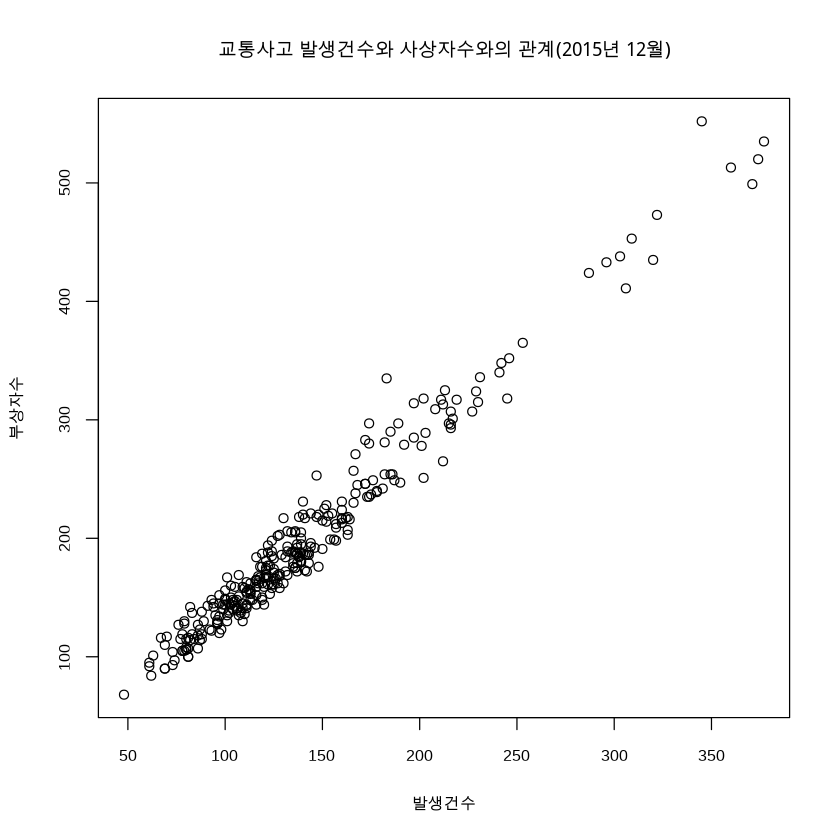

In [5]:

install.packages('showtext')
library(showtext)
font_add_google('Nanum Gothic', 'ng')
showtext_auto()


발생건수 <- seoul$발생건수
부상자수 <- seoul$부상자수

plot(발생건수, 부상자수, main='교통사고 발생건수와 사상자수와의 관계(2015년 12월)') 

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'len' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capt

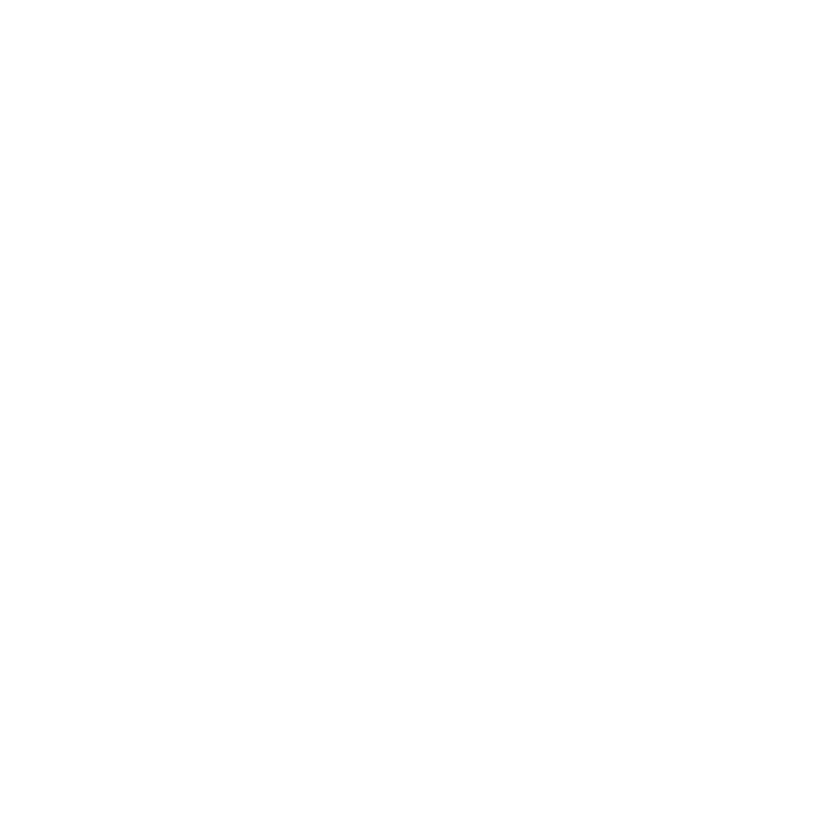

In [15]:


ggplot(seoul,aes(월,발생건수))+ 

  geom_line(aes(group=1))+ 

  geom_errorbar(aes(ymin=len-sd,ymax=len+sd),width=0.2)+ 

  geom_point(size=2)


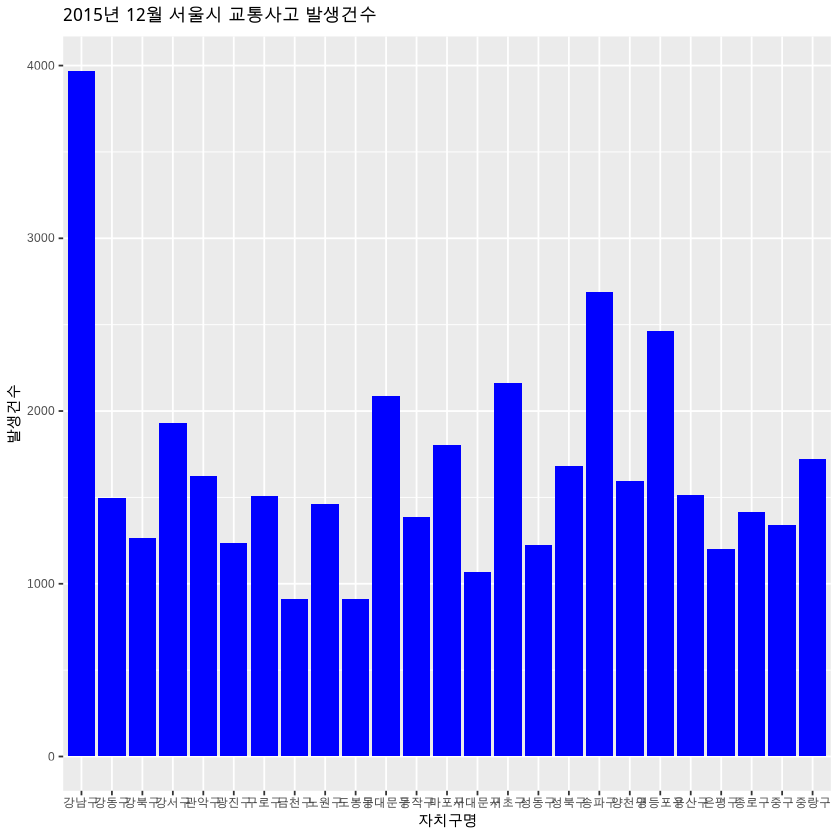

In [14]:
ggplot(seoul, aes(`자치구명`, 발생건수)) +geom_bar(fill='blue', stat='identity') + ggtitle('2015년 12월 서울시 교통사고 발생건수') 



In [19]:
#교통사고 데이터 시각화 


car <- read.csv('seoul_car_2015.txt', sep=' ')
head(car)


Warning message in file(file, "rt"):
“cannot open file 'seoul_car_2015.txt': No such file or directory”


ERROR: ignored

In [23]:
library(dplyr)

junggu <- seoul %>% filter(자치구명 == '중구') %>% 
          select(월, 발생건수)
junggu


월,발생건수
<int>,<int>
1,86
2,78
3,113
4,125
5,128
6,99
7,106
8,116
9,107


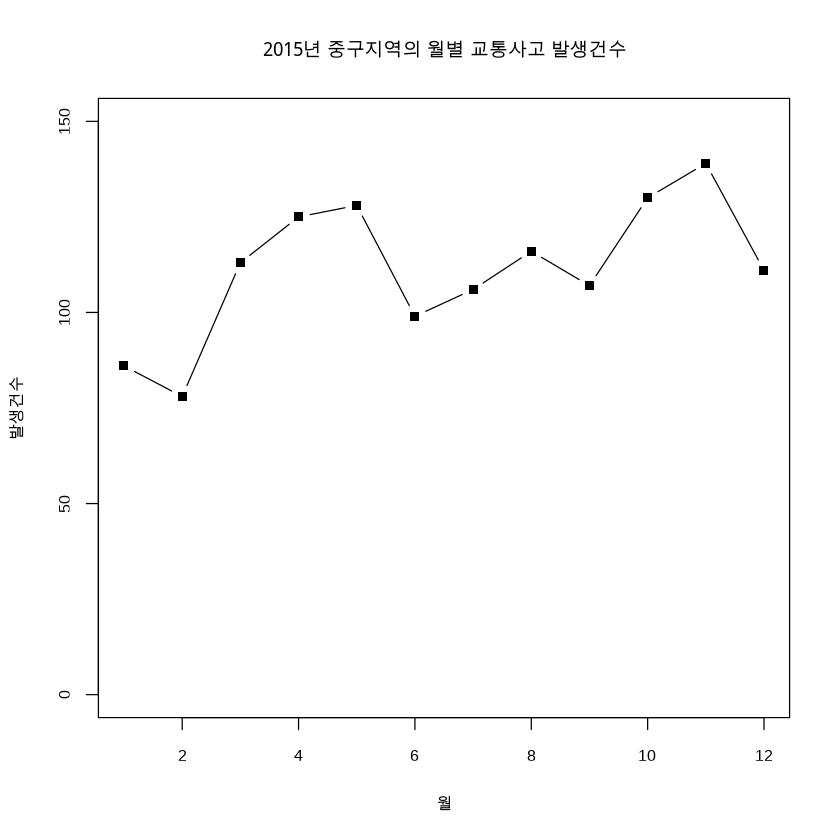

In [29]:
plot(junggu$월, junggu$`발생건수`, type='b', pch=15, ylim=c(0,150), main='2015년 중구지역의 월별 교통사고 발생건수', xlab='월', ylab='발생건수') 
 #type=b를 하면 점과 선이 같이 나옴. pch 모양 바꾸는 것. 



In [32]:
accd_12 <- seoul %>% filter(월==12)  %>% select(자치구명, 발생건수)
accd_12
              #데이터를 걸어주는 것. (이걸 해주는게 중요할 듯)




자치구명,발생건수
<chr>,<int>
종로구,121
중구,111
용산구,113
성동구,93
광진구,84
동대문구,212
중랑구,163
성북구,136
강북구,116


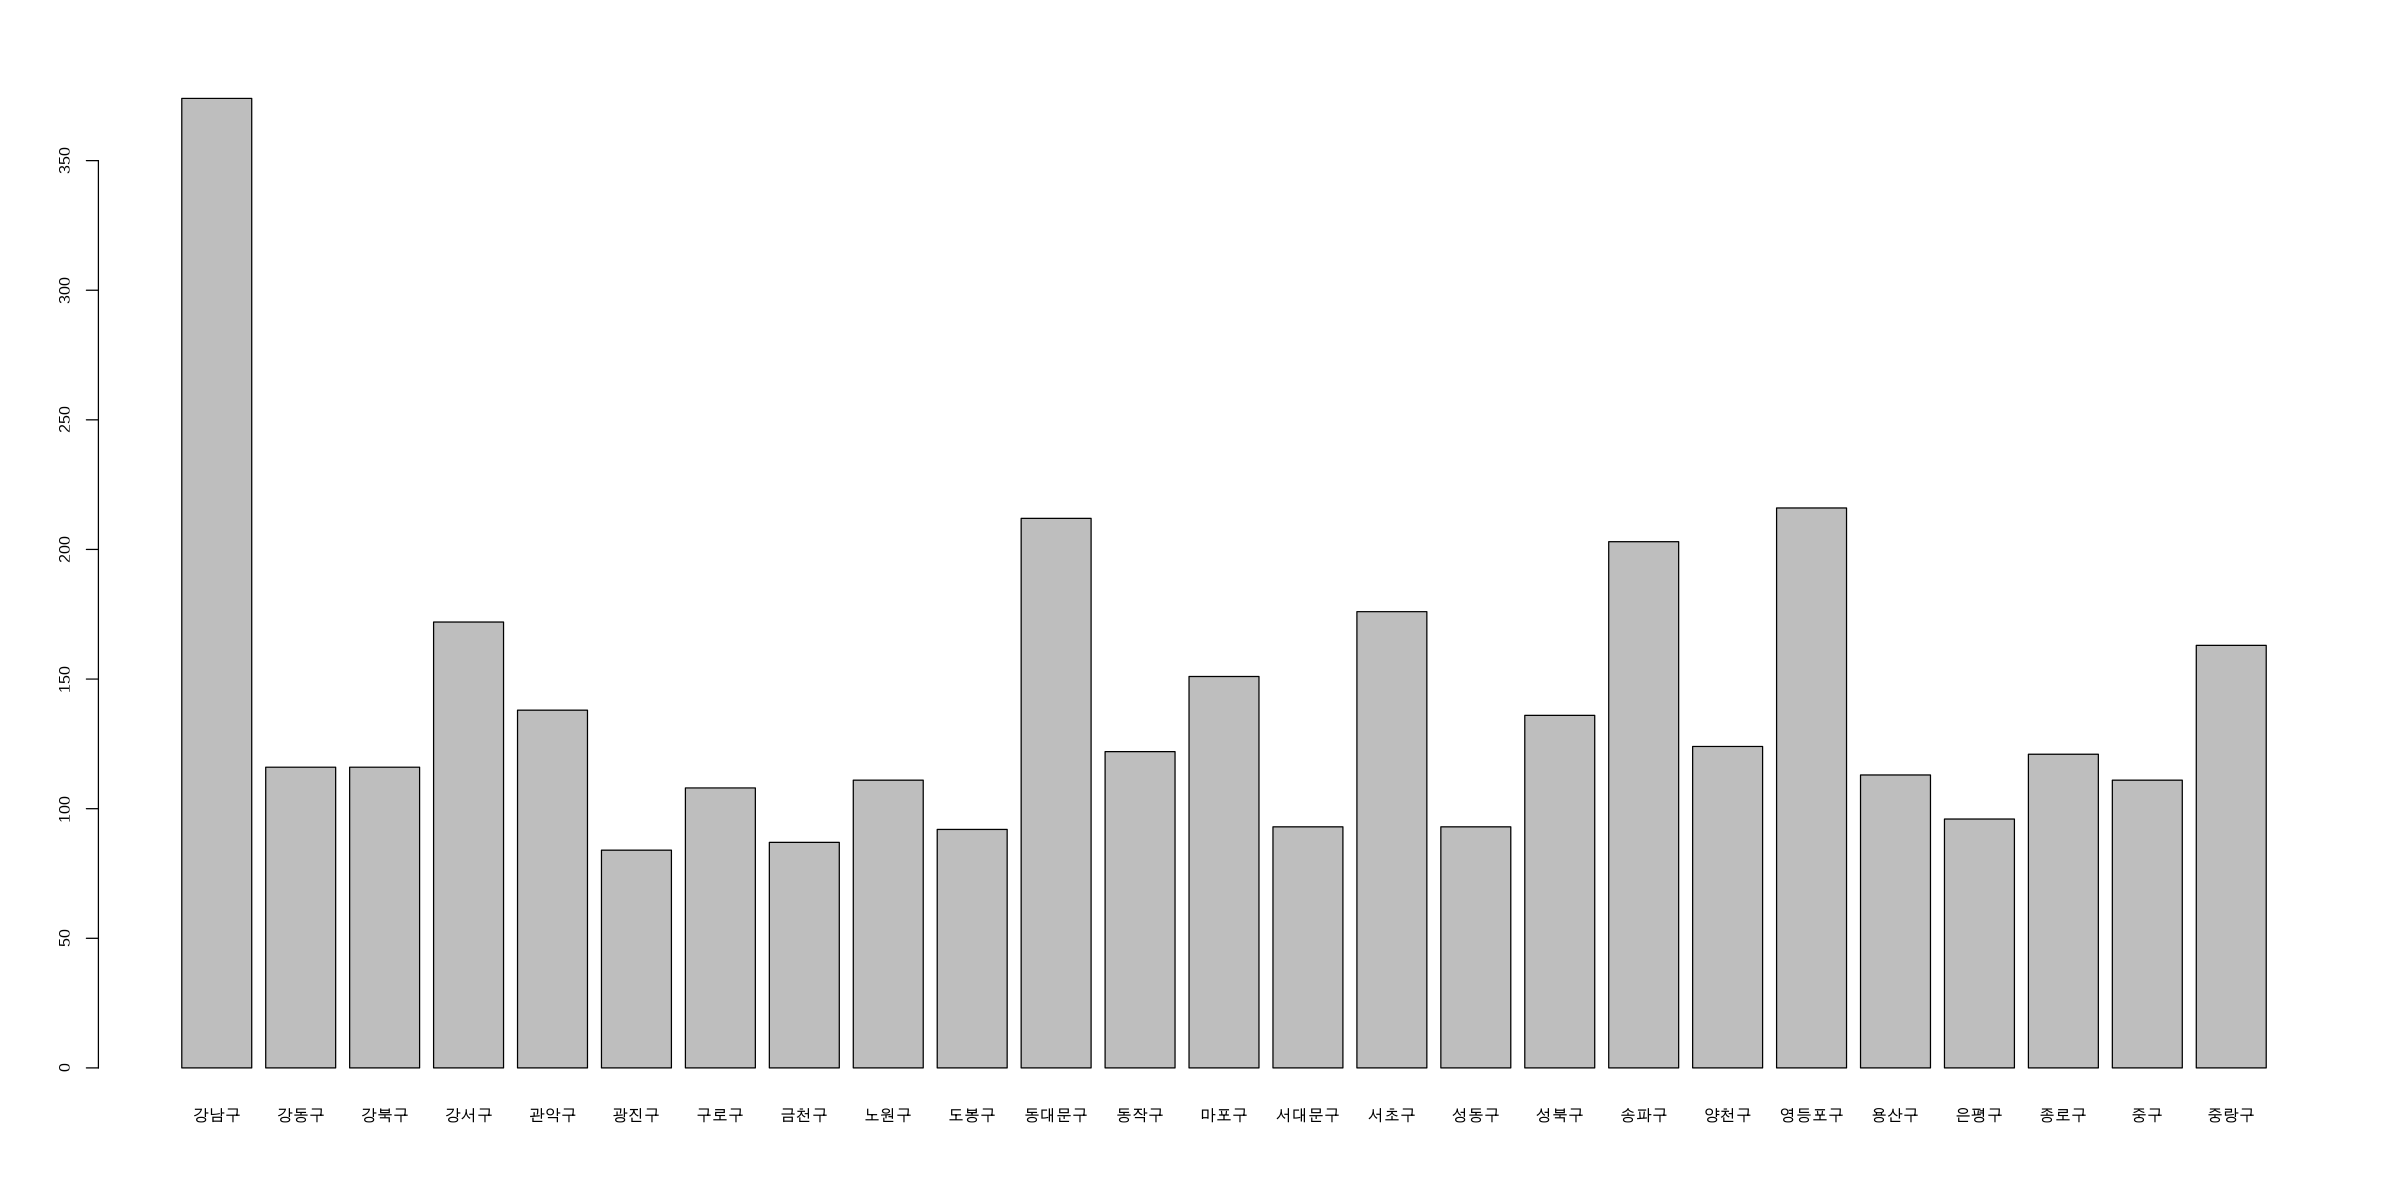

In [35]:
accd_12 <- accd_12[order(accd_12$자치구명),]


options(repr.plot.width=20, repr.plot.height=10)

barplot(accd_12$발생건수, names.arg=accd_12$자치구명)






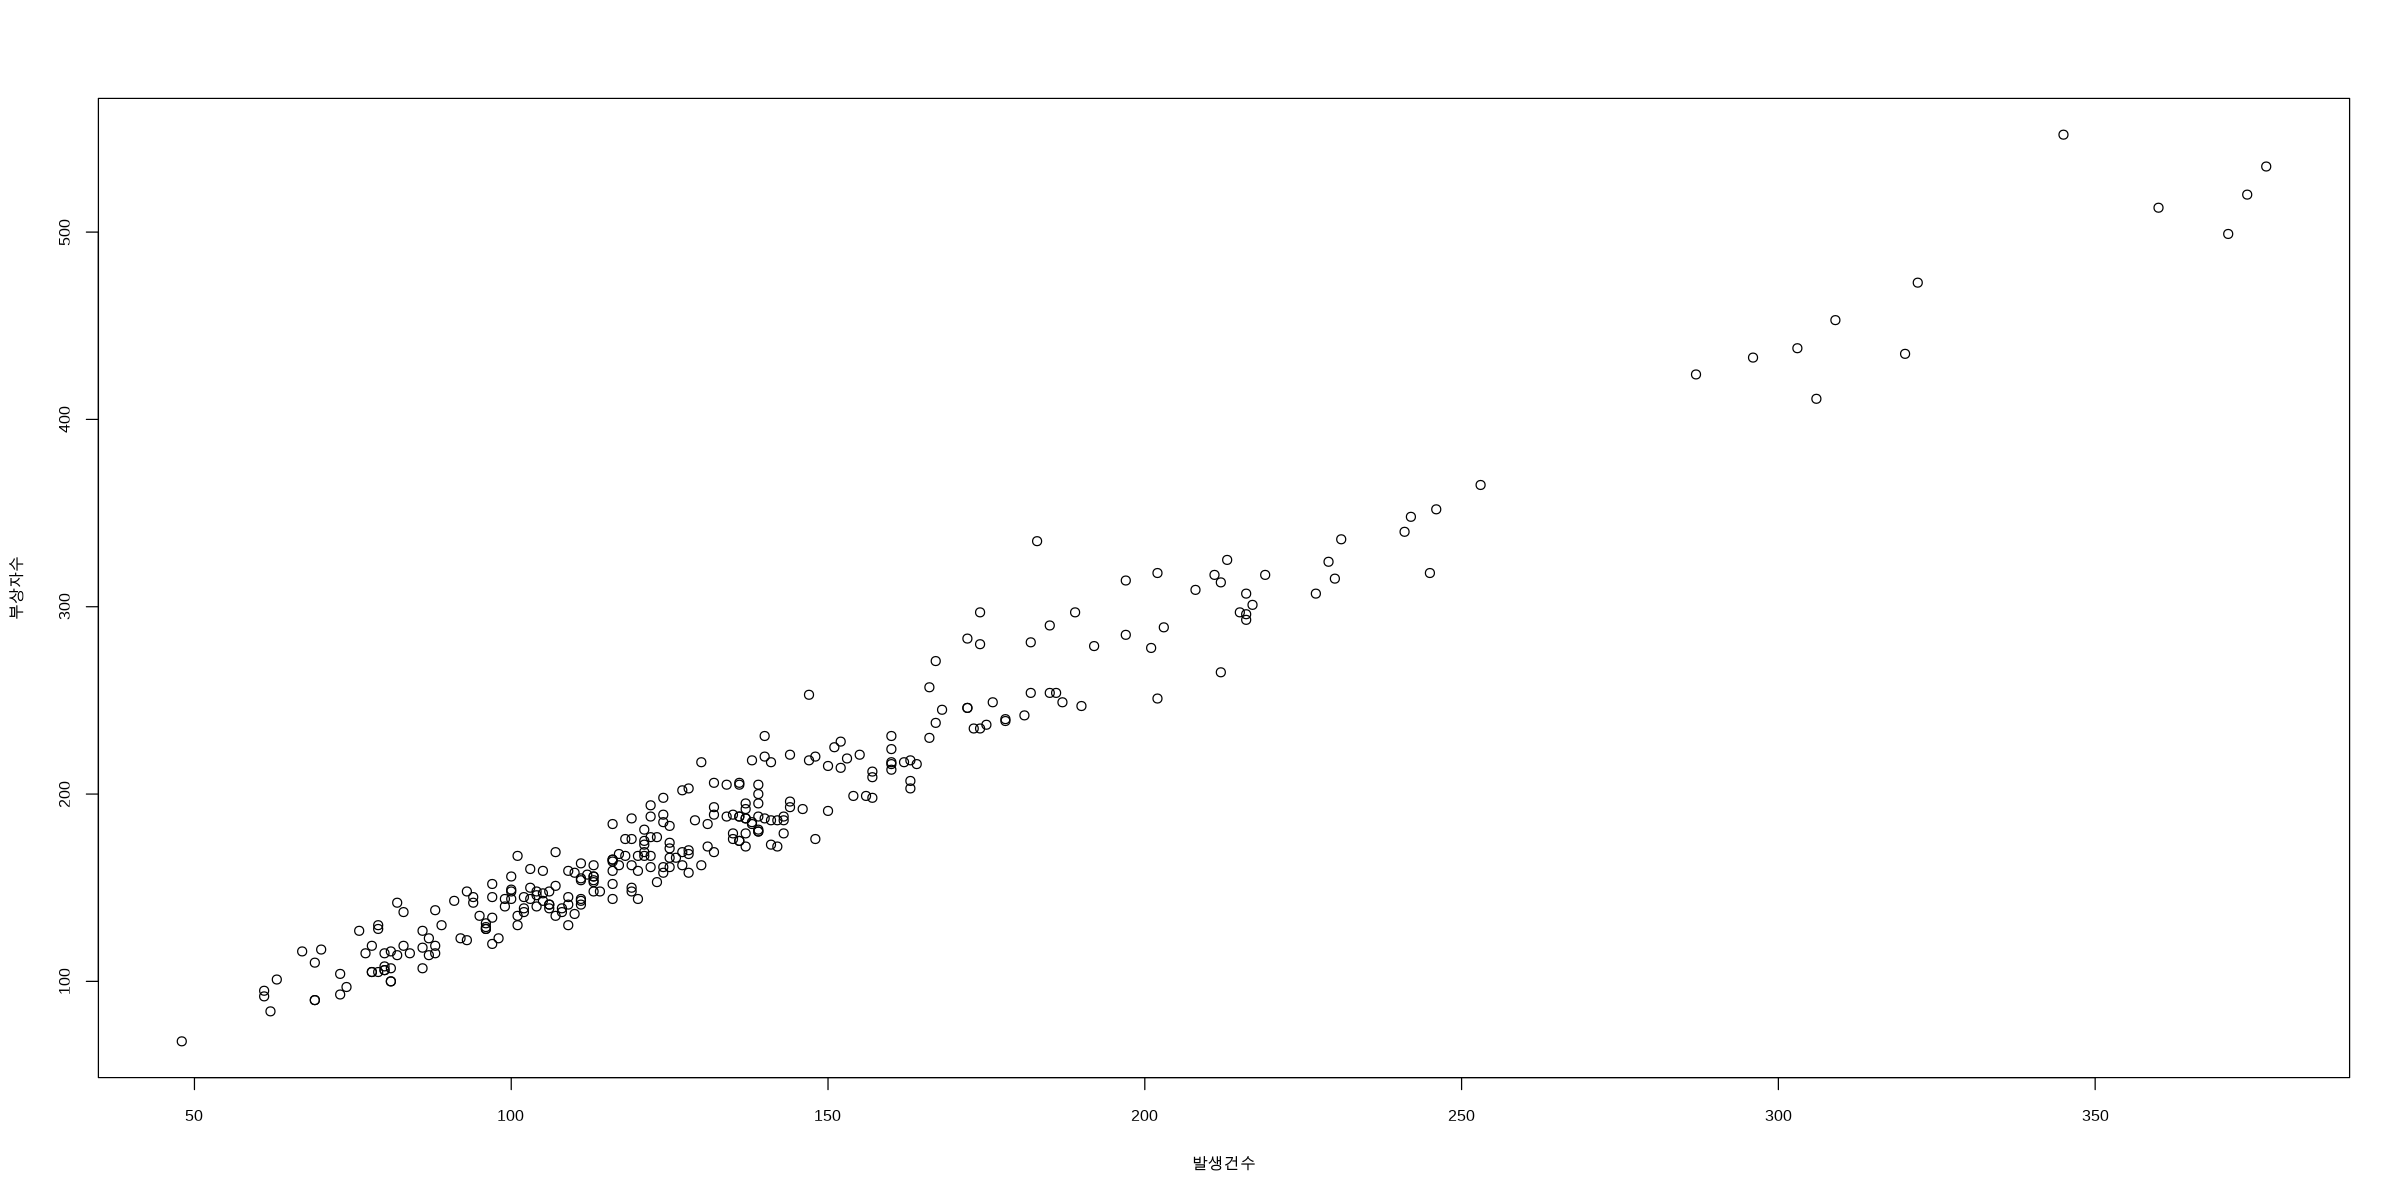

In [40]:

# 12월에 발생한 발생건수, 부상자수를 그린다면?


accd_12b <- seoul %>% filter(월==12) %>% select(발생건수, 부상자수)
plot(발생건수, 부상자수)
